***Hyperparameter Tuning of USPORF:***
- n_estimators
- max_depth
- max_features

In [39]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets.samples_generator import make_blobs
from rerf.urerf import UnsupervisedRandomForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Generate toy dataset using make_blob function from sklearn**:  

Parameters:  
1) n_samples: 200 (# of samples in dataset spread evenly across n number of clusters clusters)  
2) centers: [15, 15], [0, 0], [-15, -15] (self selected centroids for each cluster)  
3) cluster_std = 3 (spread of data points within each cluster)  
3) random_state = 0 (arbitrary value set for reproducibility)

In [161]:
# 2D toy data
centers = [[15, 2], [5, 0], [-15, 0]]
X, labels_true = make_blobs(n_samples=300, n_features = 2,
                            centers=centers, cluster_std=3,
                            random_state=0)

# 3D toy data
centers_3D = [[0, 15,0], [0, 0,0], [-15, 15,0]]
X_3D, labels_true_3D = make_blobs(n_samples=300, n_features = 3,
                            centers=centers_3D, cluster_std=3,
                            random_state=0)


# 4D toy data
centers_4D = [[-15, 10,-10,5], [0, 0,0,0], [-15, 10,-15,0]]

X_4D, labels_true_4D = make_blobs(n_samples=300, n_features = 4,
                            centers=centers_4D, cluster_std=3,
                            random_state=0)

print(X.shape)

(300, 2)


***Visualize Simulated 2D Data***

Text(0, 0.5, 'y')

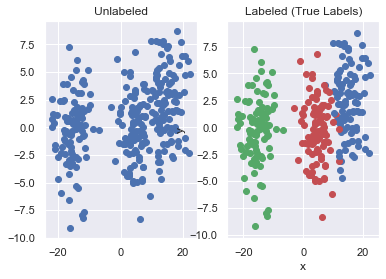

In [162]:
a = np.array(X)

# Visualize the toy data set without labels
plt.subplot(1,2,1)
plt.scatter(a[:,0],a[:,1],color = 'b')
plt.title('Unlabeled')

# Visualize the toy data set with labels
plt.subplot(1,2,2)
colors = ['b','r','g']
for k, label in zip(a,labels_true):
    plt.scatter(k[0],k[1], color = colors[label])
plt.title('Labeled (True Labels)')
plt.xlabel('x')
plt.ylabel('y')


***Visualize Simulated 3D Data***

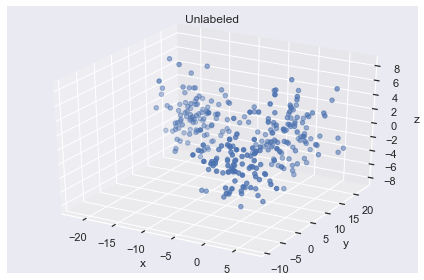

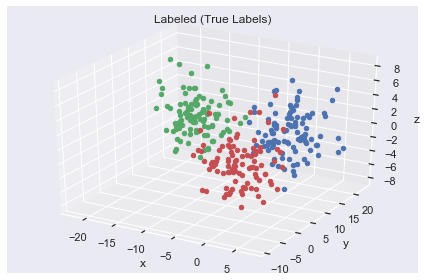

In [163]:
from mpl_toolkits.mplot3d import axes3d

b = np.array(X_3D)

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(b[:,0], b[:,1], b[:,2], color = 'b')
plt.title('Unlabeled')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()

plt.figure()
ax = plt.axes(projection='3d')
colors = ['b','r','g']
for k, label in zip(b,labels_true_3D):
    ax.scatter3D(k[0],k[1],k[2], color = colors[label])
plt.title('Labeled (True Labels)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()

***Visualize Simulated 4D Data***

    feature1   feature2   feature3  feature4  labels
0 -12.044047  12.300759 -13.792123 -5.327664  class2
1   1.398499  -1.110727  -1.361412  1.209794  class1
2 -10.699942  11.255194 -13.693362 -1.797673  class2
3 -14.379928  11.593128 -14.282563  4.193689  class2
4  -3.532887  -3.420589   5.264958 -0.398965  class1


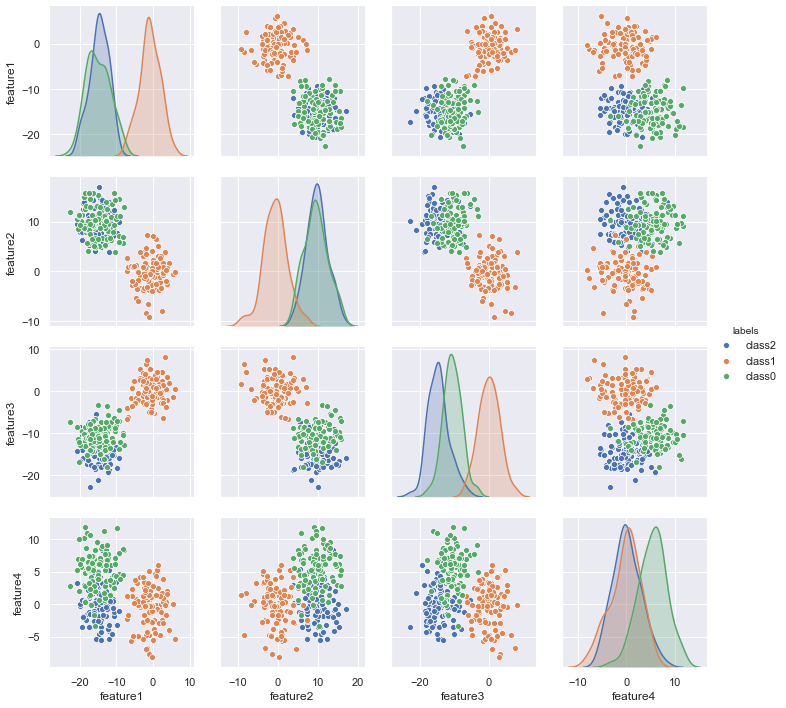

In [164]:
c = np.array(X_4D)
str_labels = []
for label in labels_true_4D:
    str_labels.append('class' + str(label))

data = {'feature1':c[:,0], 'feature2':c[:,1],
        'feature3':c[:,2], 'feature4':c[:,3],
        'labels': str_labels}

df = pd.DataFrame(data)
print(df.head())

g = sns.pairplot(df, hue="labels")

**Visualize Similarity and Dissimilarity Matrices Outputted by USPORF with default parameters**

<Figure size 432x288 with 0 Axes>

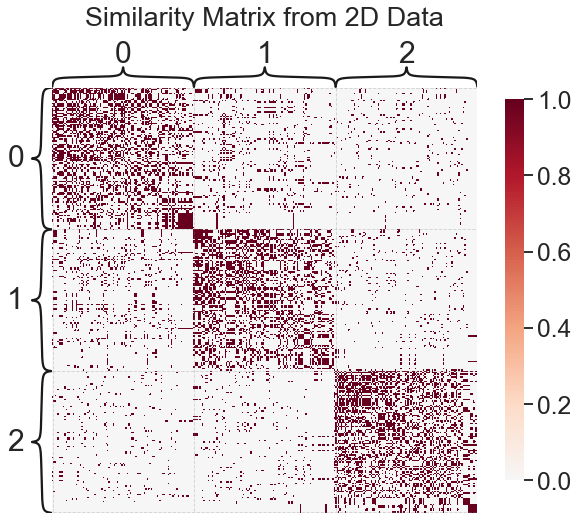

<Figure size 432x288 with 0 Axes>

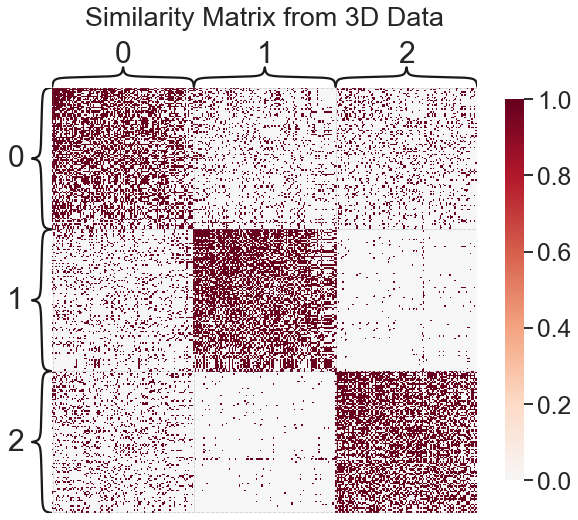

<Figure size 432x288 with 0 Axes>

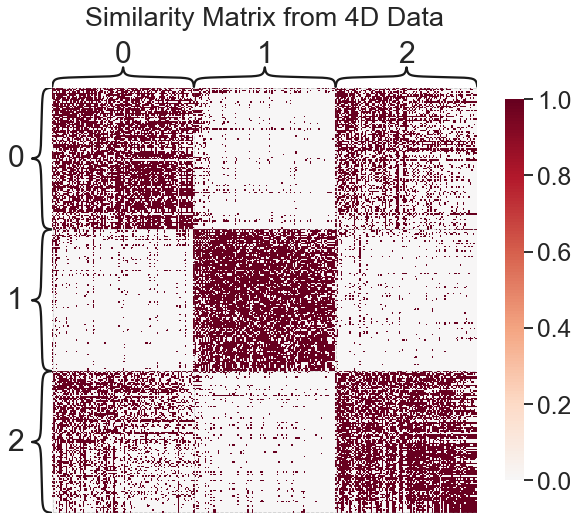

In [165]:
from graspy.plot import heatmap
from graspy.utils import binarize, symmetrize

clf = UnsupervisedRandomForest(projection_matrix="RerF",
                               random_state=0)

data = [X,X_3D, X_4D]
labels = [labels_true, labels_true_3D, labels_true_4D]
titles = ['2D','3D','4D']

for d,l,t in zip(data,labels,titles):
    clf.fit(d)
    
    sim_mat = clf.transform()

    sim_mat = binarize(sim_mat)
    plt.figure()
    heatmap(sim_mat,
            inner_hier_labels=l,
            title='Similarity Matrix from ' + t + ' Data',
            font_scale=1.5,
            sort_nodes=True);

In [166]:
cluster = AgglomerativeClustering(n_clusters=3, 
                                  affinity="precomputed",
                                  linkage="average")
predict_labels = cluster.fit_predict(1-sim_mat)
ave_score = adjusted_rand_score(labels_true, predict_labels)
print(ave_score)

0.008136318747225575


**Running multiple trials with default parameters**

In [167]:
def visualize_trial_run(data_in, labels_true):
    num_trials = 100;

    ave_scores = []

    for i in range(num_trials):
        print(i)

        # Obtain similarity matrix from USPORF classifier
        clf = UnsupervisedRandomForest(projection_matrix="RerF",
                                       random_state=0)

        clf.fit(data_in)
        sim_mat = clf.transform()

        # Cluster on the output of USPORF using Agglomerative Clustering
        cluster = AgglomerativeClustering(n_clusters=3, 
                                          affinity="precomputed",
                                          linkage="average")

        predict_labels = cluster.fit_predict(1-sim_mat)
        ave_score = adjusted_rand_score(labels_true, predict_labels)
        ave_scores.append(ave_score)
    return ave_scores

In [168]:
ave_2D_scores = visualize_trial_run(X,labels_true)
ave_3D_scores = visualize_trial_run(X_3D,labels_true_3D)
ave_4D_scores = visualize_trial_run(X_4D,labels_true_4D)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


**Plot Histogram of the ARI scores with n_estimaters = 100**

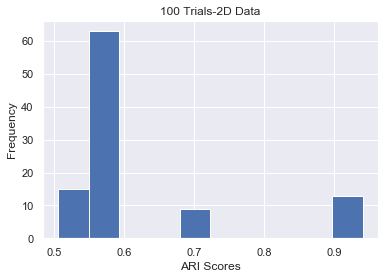

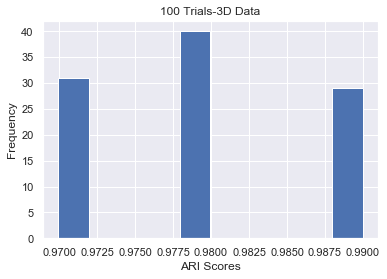

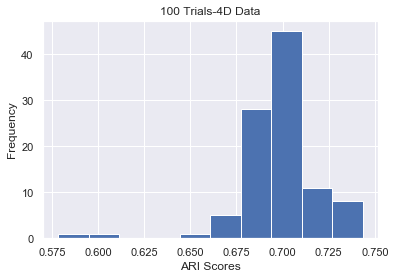

In [169]:
n_bins = 10
scores = [ave_2D_scores,ave_3D_scores,ave_4D_scores]
titles = ['100 Trials-2D Data', '100 Trials-3D Data', '100 Trials-4D Data']
for i in range(len(scores)):
    plt.figure()
    plt.hist(scores[i], n_bins)
    plt.title(titles[i])
    plt.ylabel('Frequency')
    plt.xlabel('ARI Scores')

In [170]:
def visualize_tree_effect(data_in, labels_true):
    
    trees = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400, 1000, 2000]
#              600, 800, 1200, 1600, 2000, 5000, 7500, 10000]

    num_trials = 100;
    import pandas as pd

    dataObj = pd.DataFrame()
    tree_list = []
    ari_scores = []

    for i in range(len(trees)):
        print(trees[i])
        for t in range(num_trials):

            # Obtain similarity matrix from USPORF classifier
            clf = UnsupervisedRandomForest(n_estimators = trees[i],
                                           projection_matrix="RerF",
                                           random_state=0)

            clf.fit(data_in)
            sim_mat = clf.transform()

            # Cluster on the output of USPORF using Agglomerative Clustering
            cluster = AgglomerativeClustering(n_clusters=3, 
                                              affinity="precomputed",
                                              linkage="average")

            # Get predicted labels using agglomerative clustering
            predict_labels = cluster.fit_predict(1-sim_mat)

            # Evaluate USPORF & Agglomerative Clustering as classifier
            ari_score = adjusted_rand_score(labels_true, predict_labels)

            # Save tree information and associated ARI score
            tree_list.append(trees[i])
            ari_scores.append(ari_score)

    dataObj['Number of Trees'] = tree_list
    dataObj['ARI Scores'] = ari_scores

    return dataObj

In [171]:
%%time
dataObj_2D = visualize_tree_effect(X, labels_true)

1
2
4
8
16
32
64
100
200
400
1000
2000
CPU times: user 10min 24s, sys: 2.84 s, total: 10min 27s
Wall time: 10min 28s


In [172]:
%%time
dataObj_3D = visualize_tree_effect(X_3D, labels_true_3D)

1
2
4
8
16
32
64
100
200
400
1000
2000
CPU times: user 10min 53s, sys: 2.89 s, total: 10min 56s
Wall time: 10min 57s


In [173]:
%%time
dataObj_4D = visualize_tree_effect(X_4D, labels_true_4D)

1
2
4
8
16
32
64
100
200
400
1000
2000
CPU times: user 14min 43s, sys: 3.77 s, total: 14min 47s
Wall time: 14min 48s


Text(0.5, 1.0, 'Varying Number of Trees for 2D Data')

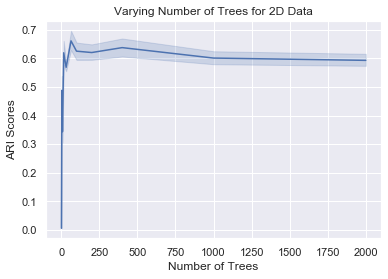

In [174]:
plt.figure()
sns.lineplot(x='Number of Trees', y='ARI Scores',data = dataObj_2D, ci = 95)
plt.title('Varying Number of Trees for 2D Data')

CPU times: user 342 ms, sys: 3.69 ms, total: 346 ms
Wall time: 346 ms


Text(0.5, 1.0, 'Varying Number of Trees for 3D Data')

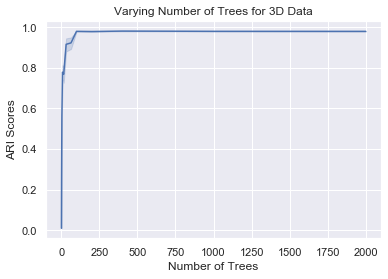

In [175]:
%%time
plt.figure()
sns.lineplot(x='Number of Trees', y='ARI Scores',data = dataObj_3D, ci = 95)
plt.title('Varying Number of Trees for 3D Data')

CPU times: user 338 ms, sys: 4.25 ms, total: 342 ms
Wall time: 341 ms


Text(0.5, 1.0, 'Varying Number of Trees for 4D Data')

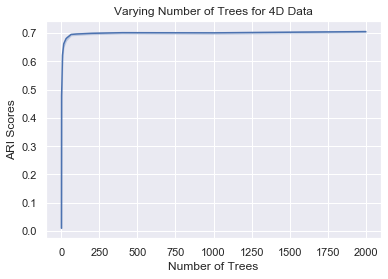

In [176]:
%%time
plt.figure()
sns.lineplot(x='Number of Trees', y='ARI Scores',data = dataObj_4D, ci = 95)
plt.title('Varying Number of Trees for 4D Data')


**Changing the depth of a tree:**  
max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data.

In [177]:
num_trials = 100;

ave_scores = []

for i in range(num_trials):

    # Obtain similarity matrix from USPORF classifier
    clf = UnsupervisedRandomForest(max_depth = 32,
                                   projection_matrix="RerF",
                                   random_state=0)

    clf.fit(X)
    sim_mat = clf.transform()
    
    # Cluster on the output of USPORF using Agglomerative Clustering
    cluster = AgglomerativeClustering(n_clusters=3, 
                                      affinity="precomputed",
                                      linkage="average")
    
    predict_labels = cluster.fit_predict(1-sim_mat)
    ave_score = adjusted_rand_score(labels_true, predict_labels)
    ave_scores.append(ave_score)

Text(0.5, 0, 'ARI Scores')

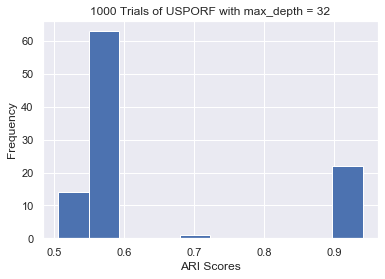

In [178]:
n_bins = 10
plt.hist(ave_scores,n_bins)
plt.title('1000 Trials of USPORF with max_depth = 32')
plt.ylabel('Frequency')
plt.xlabel('ARI Scores')

In [180]:
def visualize_depth_effect(data_in, labels_true):
    depth = 26
    num_trials = 100

    dataObj = pd.DataFrame()
    depth_list = []
    ari_scores = []

    for i in range(1,depth):
        print(i)
        for t in range(num_trials):
            print(t)
            # Obtain similarity matrix from USPORF classifier
            clf = UnsupervisedRandomForest(max_depth = i,
                                           projection_matrix="RerF",
                                           random_state=0)

            clf.fit(data_in)
            sim_mat = clf.transform()

            # Cluster on the output of USPORF using Agglomerative Clustering
            cluster = AgglomerativeClustering(n_clusters=3, 
                                              affinity="precomputed",
                                              linkage="average")

            # Get predicted labels using agglomerative clustering
            predict_labels = cluster.fit_predict(1-sim_mat)

            # Evaluate USPORF & Agglomerative Clustering as classifier
            ari_score = adjusted_rand_score(labels_true, predict_labels)

            # Save tree information and associated ARI score
            depth_list.append(i)
            ari_scores.append(ari_score)

    dataObj['Max Depth'] = depth_list
    dataObj['ARI Scores'] = ari_scores
    
    return dataObj

In [181]:
dataObj_2D = visualize_depth_effect(X,labels_true)

1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


      Max Depth  ARI Scores
0             1    0.193565
1             1    0.193565
2             1    0.272946
3             1    0.449418
4             1    0.193565
...         ...         ...
2495         25    0.551573
2496         25    0.548181
2497         25    0.548181
2498         25    0.555233
2499         25    0.548181

[2500 rows x 2 columns]


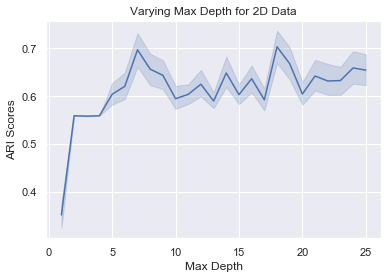

In [182]:
sns.lineplot(x='Max Depth', y='ARI Scores',data = dataObj_2D)
plt.title('Varying Max Depth for 2D Data')
print(dataObj_2D)

In [183]:
%%time
dataObj_3D = visualize_depth_effect(X_3D,labels_true_3D)

1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


      Max Depth  ARI Scores
0             1    0.485093
1             1    0.969953
2             1    0.485093
3             1    0.497968
4             1    0.969953
...         ...         ...
2495         25    0.989983
2496         25    0.979917
2497         25    0.989983
2498         25    0.969953
2499         25    0.989983

[2500 rows x 2 columns]


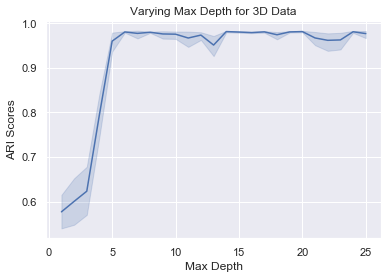

In [184]:
sns.lineplot(x='Max Depth', y='ARI Scores',data = dataObj_3D)
plt.title('Varying Max Depth for 3D Data')
print(dataObj_3D)

In [185]:
%%time
dataObj_4D = visualize_depth_effect(X_4D,labels_true_4D)

1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


      Max Depth  ARI Scores
0             1    0.544751
1             1    0.546217
2             1    0.690884
3             1    0.558789
4             1    0.568580
...         ...         ...
2495         25    0.703538
2496         25    0.683941
2497         25    0.684371
2498         25    0.702812
2499         25    0.709548

[2500 rows x 2 columns]


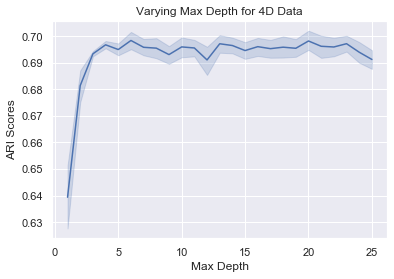

In [186]:
sns.lineplot(x='Max Depth', y='ARI Scores',data = dataObj_4D)
plt.title('Varying Max Depth for 4D Data')
print(dataObj_4D)

If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split

In [371]:
num_trials = 1000;

ave_scores = []

for i in range(num_trials):

    # Obtain similarity matrix from USPORF classifier
    clf = UnsupervisedRandomForest(max_features = 2,
                                   projection_matrix="RerF",
                                   random_state=0)

    clf.fit(X)
    sim_mat = clf.transform()
    
    # Cluster on the output of USPORF using Agglomerative Clustering
    cluster = AgglomerativeClustering(n_clusters=3, 
                                      affinity="precomputed",
                                      linkage="single")
    
    predict_labels = cluster.fit_predict(1-sim_mat)
    ave_score = adjusted_rand_score(labels_true, predict_labels)
    ave_scores.append(ave_score)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features=0.5, min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


Text(0.5, 0, 'ARI Scores')

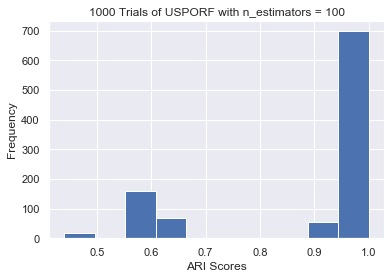

In [372]:
n_bins = 10
plt.hist(ave_scores,n_bins)
plt.title('1000 Trials of USPORF with max_features = 2')
plt.ylabel('Frequency')
plt.xlabel('ARI Scores')

In [375]:
n_features = 3
num_trials = 100

dataObj = pd.DataFrame()
feature_list = np.ones((n_features-1)*num_trials)
ari_scores = np.ones((n_features-1)*num_trials)

count = 0
for i in range(1,n_features):
    print(i)
    for t in range(num_trials):
        # Obtain similarity matrix from USPORF classifier
        clf = UnsupervisedRandomForest(max_features = i,
                                       projection_matrix="RerF",
                                       random_state=0)

        clf.fit(X)
        sim_mat = clf.transform()

        # Cluster on the output of USPORF using Agglomerative Clustering
        cluster = AgglomerativeClustering(n_clusters=3, 
                                          affinity="precomputed",
                                          linkage="single")

        # Get predicted labels using agglomerative clustering
        predict_labels = cluster.fit_predict(1-sim_mat)
        
        # Evaluate USPORF & Agglomerative Clustering as classifier
        ari_score = adjusted_rand_score(labels_true, predict_labels)
        
        # Save tree information and associated ARI score
        feature_list[count]=i
        ari_scores[count]=ari_score
        count += 1

dataObj['Max Features'] = feature_list
dataObj['ARI Scores'] = ari_scores

1
2


     Max Features  ARI Scores
0             1.0    0.566873
1             1.0    0.556865
2             1.0    0.984887
3             1.0    0.630146
4             1.0    0.556865
..            ...         ...
195           2.0    1.000000
196           2.0    1.000000
197           2.0    1.000000
198           2.0    1.000000
199           2.0    1.000000

[200 rows x 2 columns]


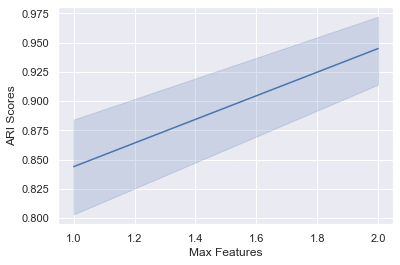

In [376]:
sns.lineplot(x='Max Features', y='ARI Scores',data = dataObj)
print(dataObj)